In [62]:
import pandas as pd 
import numpy as np 


In [63]:
label= [
    'CHF_USD.csv',

    'CHF_EUR.csv',
    'CHF_GBP.csv',
    'CHF_JPY.csv',
    'CHF_CAD.csv',
    'SMI.csv',
    
    'USD_JPY.csv',
    'USD_EUR.csv',
    'USD_GBP.csv',
    'USD_CAD.csv',
    'SP500.csv'
]
df = []
for name in label:
    b = pd.read_csv(name)[['Date', 'Open']]
   # print(name,len(b), b.isnull().sum().sum(), b.Date.iloc[-1], b.Date.iloc[0])
    b.Date = pd.to_datetime(b.Date)
    b.Open = b.Open.astype(str)
    b.Open = b.Open.apply(lambda x: x.replace(',','') )

    b.Open = b.Open.astype(float)
    b = b.rename(columns={'Open':'Open_'+name[:-4]})
    df.append(b)
    print(name,len(b), b.isnull().sum().sum(), b.Date.iloc[-1], b.Date.iloc[0])
print("--")


CHF_USD.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
CHF_EUR.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
CHF_GBP.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
CHF_JPY.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
CHF_CAD.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
SMI.csv 5000 0 2000-01-04 00:00:00 2019-11-04 00:00:00
USD_JPY.csv 5000 0 2000-01-03 00:00:00 2019-03-05 00:00:00
USD_EUR.csv 5000 0 2000-01-03 00:00:00 2019-03-06 00:00:00
USD_GBP.csv 5000 0 2000-01-04 00:00:00 2019-03-13 00:00:00
USD_CAD.csv 5000 0 2000-01-03 00:00:00 2019-03-05 00:00:00
SP500.csv 5000 0 2000-01-03 00:00:00 2019-11-14 00:00:00
--


In [64]:
buff = df[0]

for d in df[1:]:
 
   buff = buff.merge(d, left_on='Date', right_on='Date')


buff

,Date,Open_CHF_USD,Open_CHF_EUR,Open_CHF_GBP,Open_CHF_JPY,Open_CHF_CAD,Open_SMI,Open_USD_JPY,Open_USD_EUR,Open_USD_GBP,Open_USD_CAD,Open_SP500
0,2019-03-05,1.0009,0.8827,0.7589,111.85,1.3316,9358.95,111.72,0.8820,0.7589,1.3303,2794.41
1,2019-03-04,1.0015,0.8797,0.7562,111.88,1.3307,9431.70,111.77,0.8788,0.7554,1.3293,2814.37
2,2019-03-01,1.0016,0.8809,0.7553,111.57,1.3195,9431.83,111.39,0.8785,0.7540,1.3172,2798.22
3,2019-02-28,0.9984,0.8781,0.7502,110.82,1.3137,9402.14,111.00,0.8794,0.7513,1.3155,2788.11
4,2019-02-27,1.0000,0.8781,0.7548,110.61,1.3170,9427.04,110.58,0.8778,0.7547,1.3168,2787.50
...,...,...,...,...,...,...,...,...,...,...,...,...
4706,2000-01-10,0.6373,0.6207,0.3898,67.17,0.9308,7518.70,105.12,0.9713,0.6106,1.4570,1441.50
4707,2000-01-07,0.6390,0.6242,0.3912,67.85,0.9404,7338.70,105.27,0.9683,0.6108,1.4595,1403.50
4708,2000-01-06,0.6435,0.6221,0.3912,67.05,0.9317,7177.20,104.32,0.9681,0.6069,1.4502,1402.10
4709,2000-01-05,0.6429,0.6234,0.3926,66.34,0.9328,7153.10,103.28,0.9711,0.6101,1.4528,1399.40


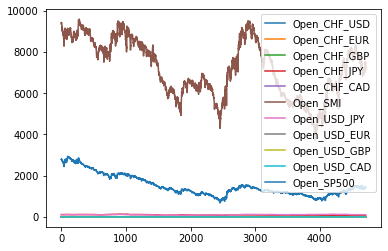

In [65]:
import matplotlib.pyplot as plt
buff.sort_values(by='Date', ascending=True).iloc[:, 1:].plot()
plt.show()

In [68]:
buff.to_csv('dataset_daily.csv')

<AxesSubplot:>

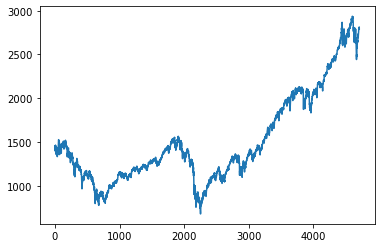

In [67]:

buff = buff.sort_values(by='Date', ascending=True)
buff = buff.reset_index(drop=True)
buff['Open_SP500'].plot()

<AxesSubplot:>

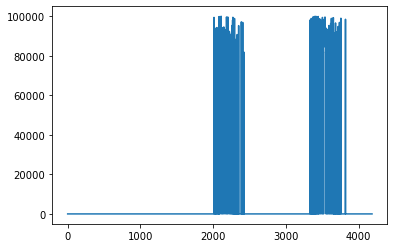